# Group 5
## Team members:
- Jianting Liu(8950907)
- David (8999846) 
- Marieth (9016702)


# 3. Use Case: Predicting Canadian Housing Prices

## Problem Statement

The Canadian housing market has experienced significant fluctuations over the past two decades. Accurately predicting future housing prices is crucial for various stakeholders, including homeowners, real estate investors, and policymakers. This project aims to develop a machine learning model that can effectively predict Canadian housing prices based on historical data and relevant economic indicators.

## Objectives

1. **Identify Key Factors**: Determine the most significant factors influencing Canadian housing prices, such as population growth, median income, interest rates, and economic indicators.
2. **Build Predictive Model**: Develop a robust machine learning model capable of accurately forecasting future housing prices.
3. **Evaluate Model Performance**: Assess the model's performance using appropriate metrics, such as mean squared error (MSE) and R-squared.
4. **Validate Findings**: Conduct hypothesis testing to validate the significance of the identified factors and the overall predictive power of the model.

## Data

The dataset will comprise historical Canadian housing price data spanning at least 20 years. Additional features will include:

* Demographic data: Population growth, age distribution, and household size.
* Economic indicators: Gross domestic product (GDP), inflation rate, unemployment rate, and consumer confidence index.
* Interest rates: Mortgage rates and overall interest rates.
* Housing supply and demand: Number of new housing starts, inventory levels, and housing affordability indices.

## Methodology

### Data Preprocessing:
* Handle missing values and outliers.
* Normalize numerical features.
* Encode categorical features.

### Feature Engineering:
* Create new features, such as interaction terms and time-based features.
* Select relevant features using techniques like correlation analysis and feature importance.

### Model Selection and Training:
* Experiment with various regression algorithms, including linear regression, decision trees, random forests, and neural networks.
* Employ techniques like cross-validation to evaluate model performance and prevent overfitting.

### Hypothesis Testing:
* **Null Hypothesis**: The macroeconomic indicators (median income, mortgage rates, and population) do not have a significant influence on house prices across different property types.

* **Alternative Hypothesis**: The hypothesis posits that macroeconomic indicators such as median income, mortgage rates, and population significantly influence house prices across different property types.
* Conduct t-tests or F-tests to determine the statistical significance of the coefficients in the regression model.

## Evaluation

The model's performance will be evaluated using the following metrics:

* **Mean Squared Error (MSE)**: Measures the average squared difference between the predicted and actual values.
* **Root Mean Squared Error (RMSE)**: The square root of MSE, providing a more interpretable error metric.
* **R-squared**: Measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

## Expected Outcomes

1. **Identify key drivers of housing prices**: The analysis will uncover the most significant factors influencing housing prices in Canada.
2. **Develop a predictive model**: A robust machine learning model will be developed to forecast future housing prices with a high degree of accuracy.
3. **Inform decision-making**: The model can be used by various stakeholders to make informed decisions related to real estate investments, mortgage lending, and urban planning.

## Limitations and Future Work

### Current Limitations:
* **Data Availability**: The quality and availability of data can impact the model's accuracy.
* **External Factors**: Unforeseen events, such as natural disasters or economic crises, can significantly impact housing prices and may not be fully captured by the model.
* **Model Complexity**: As the model becomes more complex, interpretability may decrease.

### Future Research Directions:
* **Spatial analysis**: Incorporating geographic information to account for regional variations in housing prices.
* **Time series analysis**: Using time series models to capture the temporal dependencies in housing prices.
* **Deep learning**: Applying deep learning techniques to model complex non-linear relationships.

By addressing these limitations and exploring future research directions, this project can contribute to a deeper understanding of the Canadian housing market and provide valuable insights for policymakers and market participants.

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 
df = pd.read_csv("melted_data_1120.csv")
df


,Date,Median income,Population,Mortgage Rate,Interest Rate,property_type,price
0,2005-01-01,4487.500000,1.069167e+07,5.60,2.75,One_storey,207700
1,2005-02-01,4487.500000,1.069167e+07,5.59,2.75,One_storey,208400
2,2005-03-01,4487.500000,1.069167e+07,5.60,2.75,One_storey,209200
3,2005-04-01,4487.500000,1.071352e+07,5.67,2.75,One_storey,210100
4,2005-05-01,4487.500000,1.071352e+07,5.55,2.75,One_storey,210600
...,...,...,...,...,...,...,...
1040,2022-01-01,5066.666667,1.285534e+07,3.44,0.50,Composite,810100
1041,2022-02-01,5066.666667,1.285534e+07,3.58,0.50,Composite,834700
1042,2022-03-01,5066.666667,1.285534e+07,3.77,0.75,Composite,834300
1043,2022-04-01,5066.666667,1.289414e+07,4.19,1.25,Composite,819800


# 4. Comprehensive Data Analysis

Missing Values Analysis:
Date             0
Median income    0
Population       0
Mortgage Rate    0
Interest Rate    0
property_type    0
price            0
dtype: int64


/var/folders/n8/_7l90t7n157_kttk81fqmp300000gn/T/ipykernel_8415/3130934676.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.data[col].fillna(self.data[col].median(), inplace=True)
/var/folders/n8/_7l90t7n157_kttk81fqmp300000gn/T/ipykernel_8415/3130934676.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

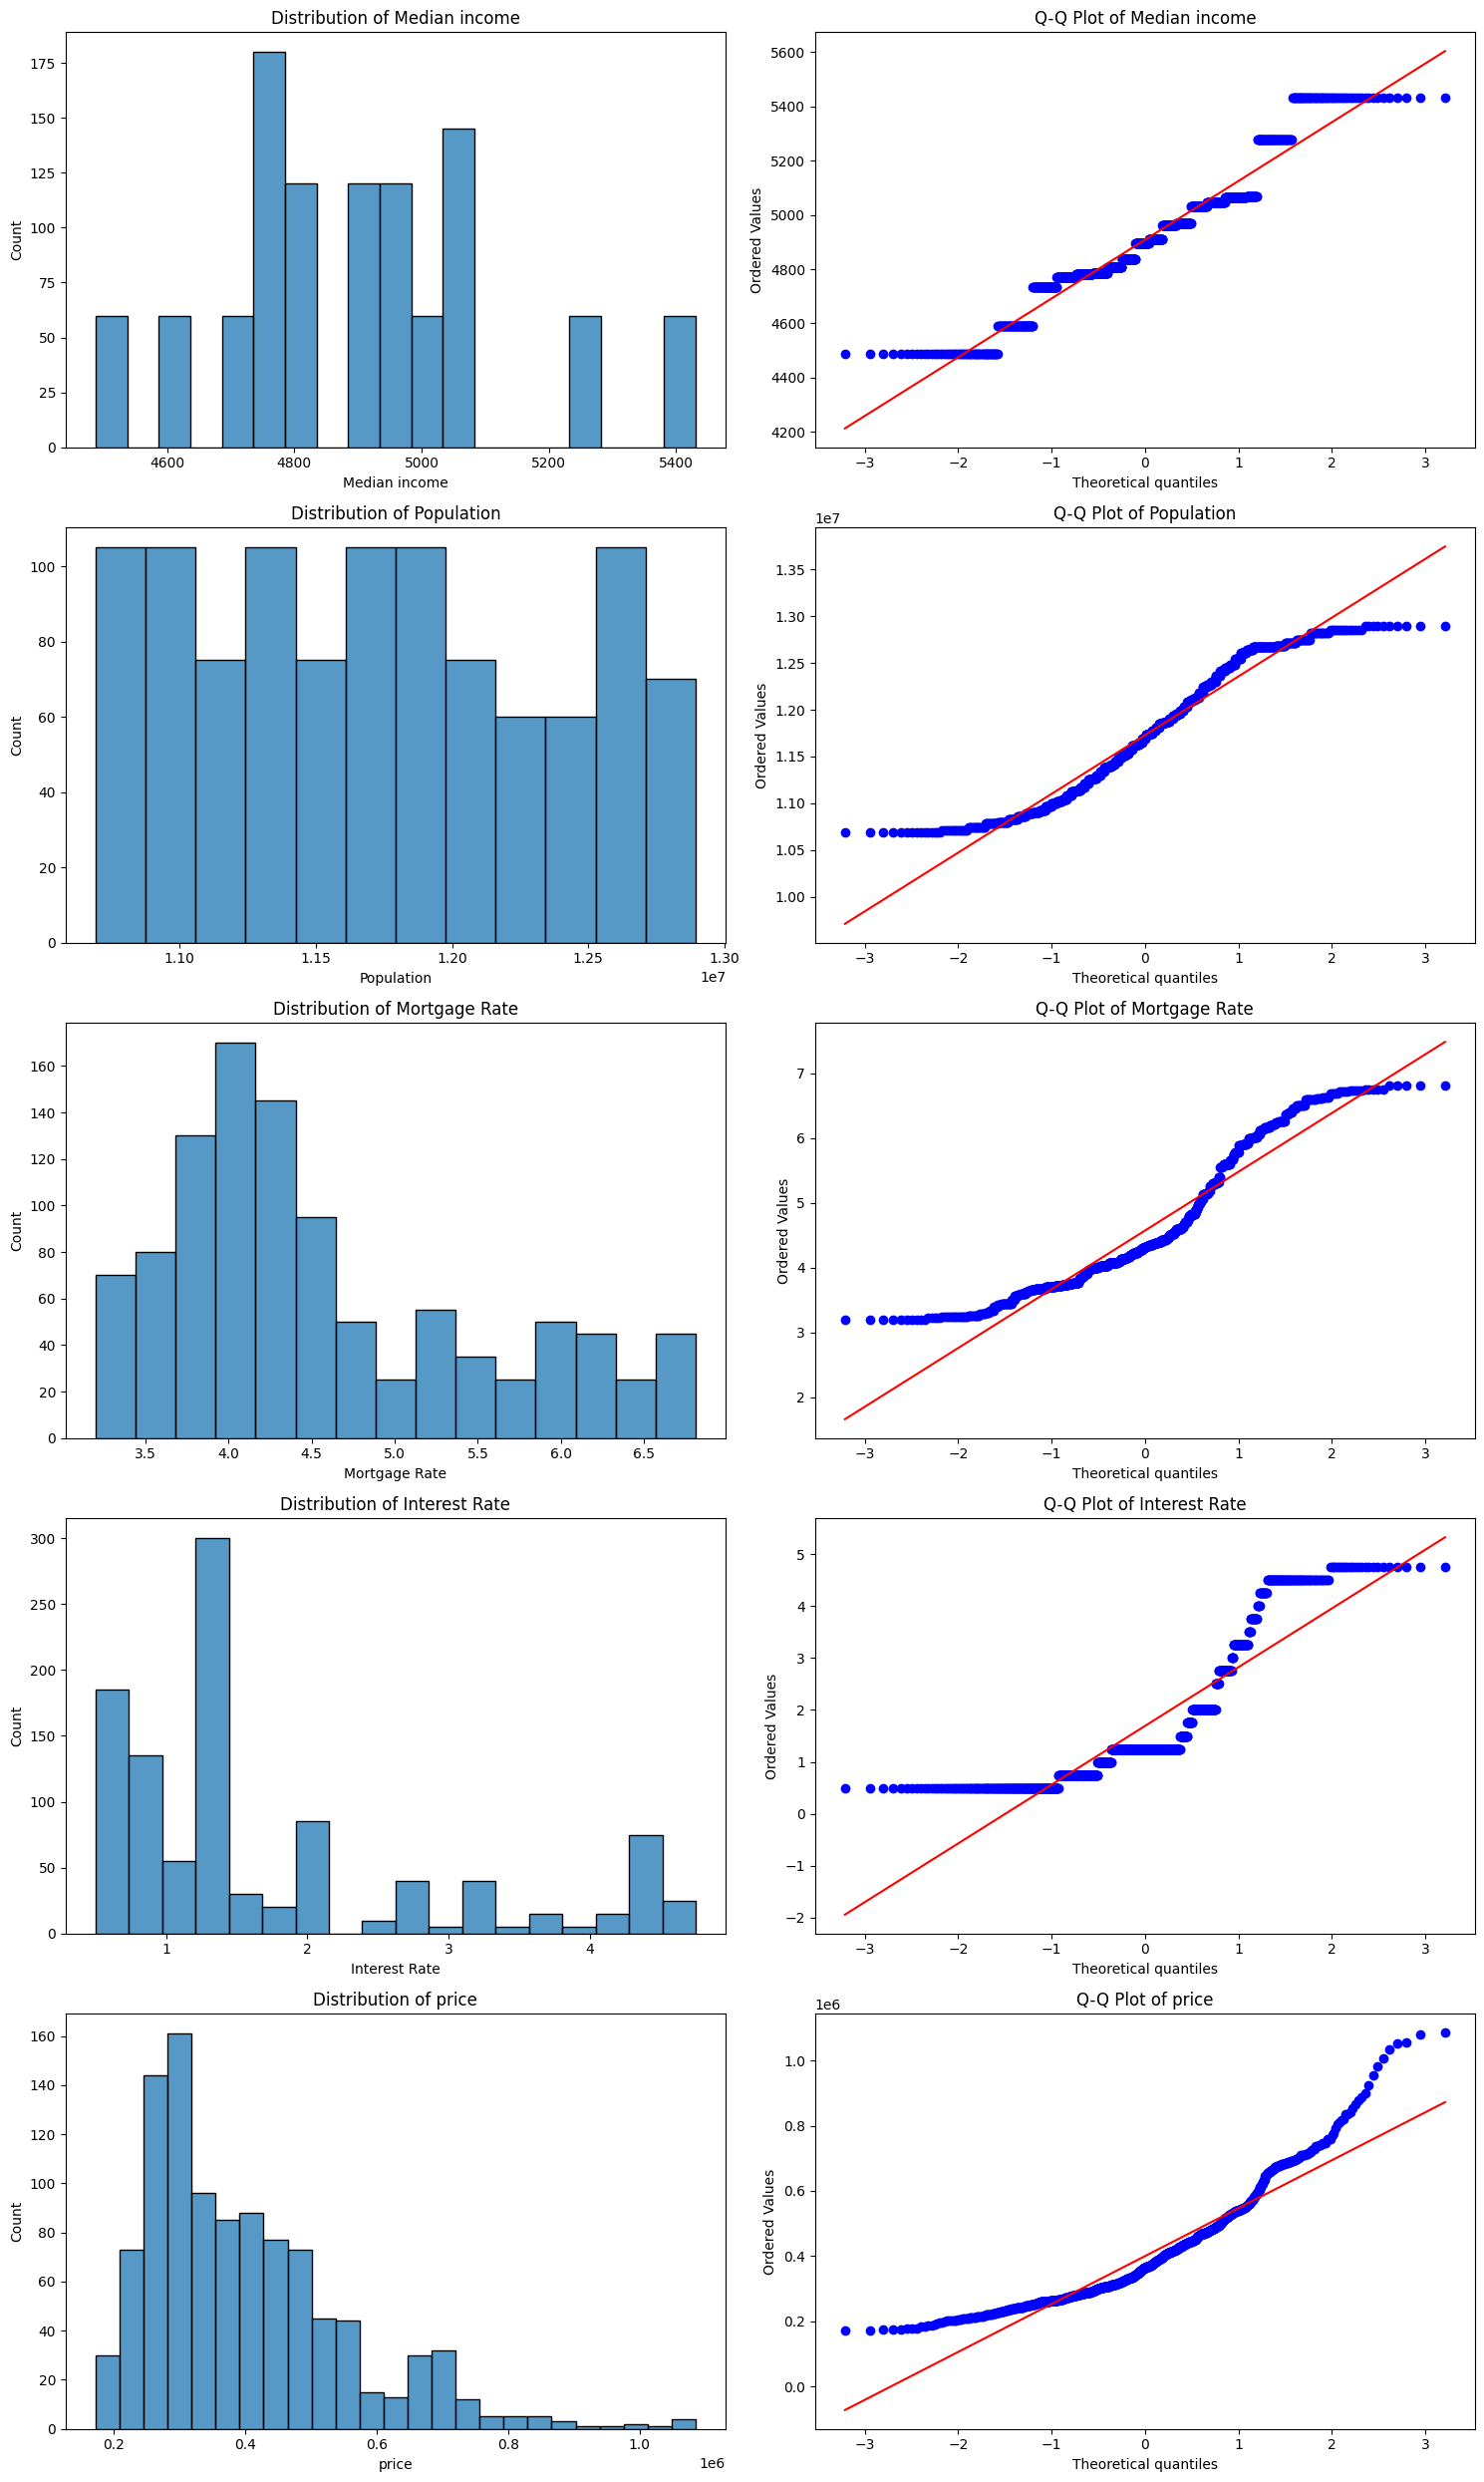


Numeric Variables Summary:
       Median income    Population  Mortgage Rate  Interest Rate         price
count    1045.000000  1.045000e+03    1045.000000    1045.000000  1.045000e+03
mean     4908.341308  1.172827e+07       4.572297       1.691388  3.998625e+05
std       222.128572  6.417847e+05       0.946217       1.262333  1.544395e+05
min      4487.500000  1.069167e+07       3.200000       0.500000  1.720000e+05
25%      4783.333333  1.117077e+07       3.860000       0.750000  2.852000e+05
50%      4894.166667  1.169366e+07       4.320000       1.250000  3.648000e+05
75%      5047.500000  1.226719e+07       5.150000       2.000000  4.746000e+05
max      5430.833333  1.289414e+07       6.810000       4.750000  1.085300e+06

Categorical Variables Summary:
              Date property_type
count         1045          1045
unique         209             5
top     2005-01-01    One_storey
freq             5           209

Correlation Analysis:


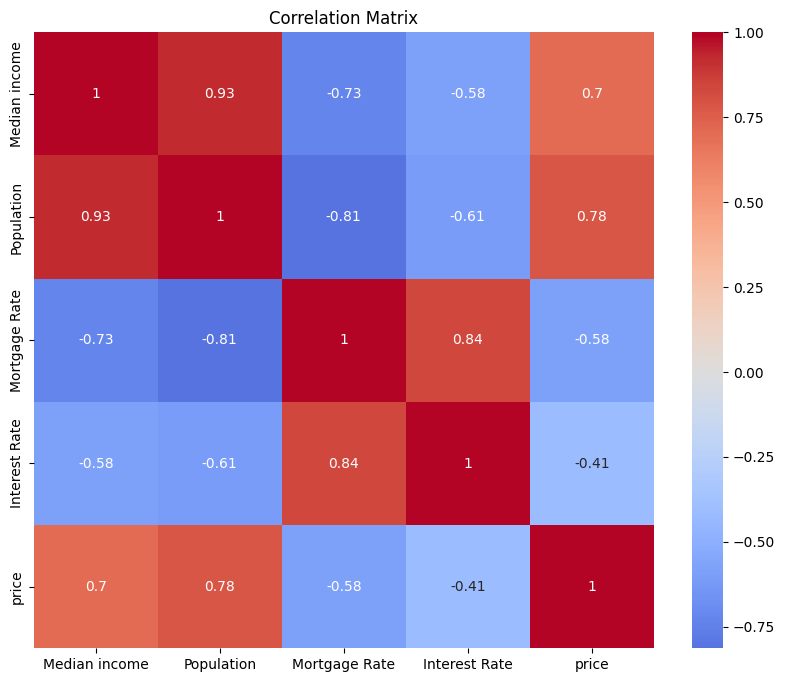

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

class DataAnalyzer:
    """
    A class to perform Exploratory Data Analysis on housing data
    """
    def __init__(self, data):
        """
        Initialize with pandas DataFrame
        """
        self.data = data
        self.numeric_columns = self.data.select_dtypes(include=[np.number]).columns
        self.categorical_columns = self.data.select_dtypes(exclude=[np.number]).columns

    def check_missing_values(self):
        """
        Analyze missing values in the dataset
        """
        missing = self.data.isnull().sum()
        
        return missing

    def handle_missing_values(self):
        """
        Handle missing values using appropriate methods
        """
        # Numeric columns: fill with median
        for col in self.numeric_columns:
            self.data[col].fillna(self.data[col].median(), inplace=True)
        
        # Categorical columns: fill with mode
        for col in self.categorical_columns:
            self.data[col].fillna(self.data[col].mode()[0], inplace=True)
        
        return self.data

    def plot_distributions(self):
        """
        Plot histograms for all numeric columns to check normality
        """
        n_cols = len(self.numeric_columns)
        fig, axes = plt.subplots(n_cols, 2, figsize=(15, 5*n_cols))
        
        for idx, col in enumerate(self.numeric_columns):
            # Histogram
            sns.histplot(data=self.data, x=col, ax=axes[idx, 0])
            axes[idx, 0].set_title(f'Distribution of {col}')
            
            # Q-Q plot to check normality
            stats.probplot(self.data[col], dist="norm", plot=axes[idx, 1])
            axes[idx, 1].set_title(f'Q-Q Plot of {col}')
        
        plt.tight_layout()
        plt.show()

    def describe_data(self):
        """
        Generate descriptive statistics
        """
        numeric_stats = self.data[self.numeric_columns].describe()
        categorical_stats = self.data[self.categorical_columns].describe()
        return numeric_stats, categorical_stats

    def correlation_analysis(self):
        """
        Analyze correlations between numeric variables
        """
        correlation_matrix = self.data[self.numeric_columns].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Matrix')
        plt.show()
        return correlation_matrix

    def analyze_categorical(self):
        """
        Analyze categorical variables
        """
        for col in self.categorical_columns:
            plt.figure(figsize=(10, 5))
            sns.countplot(data=self.data, x=col)
            plt.title(f'Distribution of {col}')
            plt.xticks(rotation=45)
            plt.show()

# Usage example:
def main():
    
    # Create analyzer instance
    analyzer = DataAnalyzer(df)
    
    # Check missing values
    print("Missing Values Analysis:")
    print(analyzer.check_missing_values())
    
    # Handle missing values
    df_cleaned = analyzer.handle_missing_values()
    
    # Plot distributions and check normality
    analyzer.plot_distributions()
    
    # Get descriptive statistics
    numeric_stats, categorical_stats = analyzer.describe_data()
    print("\nNumeric Variables Summary:")
    print(numeric_stats)
    print("\nCategorical Variables Summary:")
    print(categorical_stats)
    
    # Correlation analysis
    print("\nCorrelation Analysis:")
    correlation_matrix = analyzer.correlation_analysis()
    
    # Analyze categorical variables
    #analyzer.analyze_categorical()

if __name__ == "__main__":
    main()

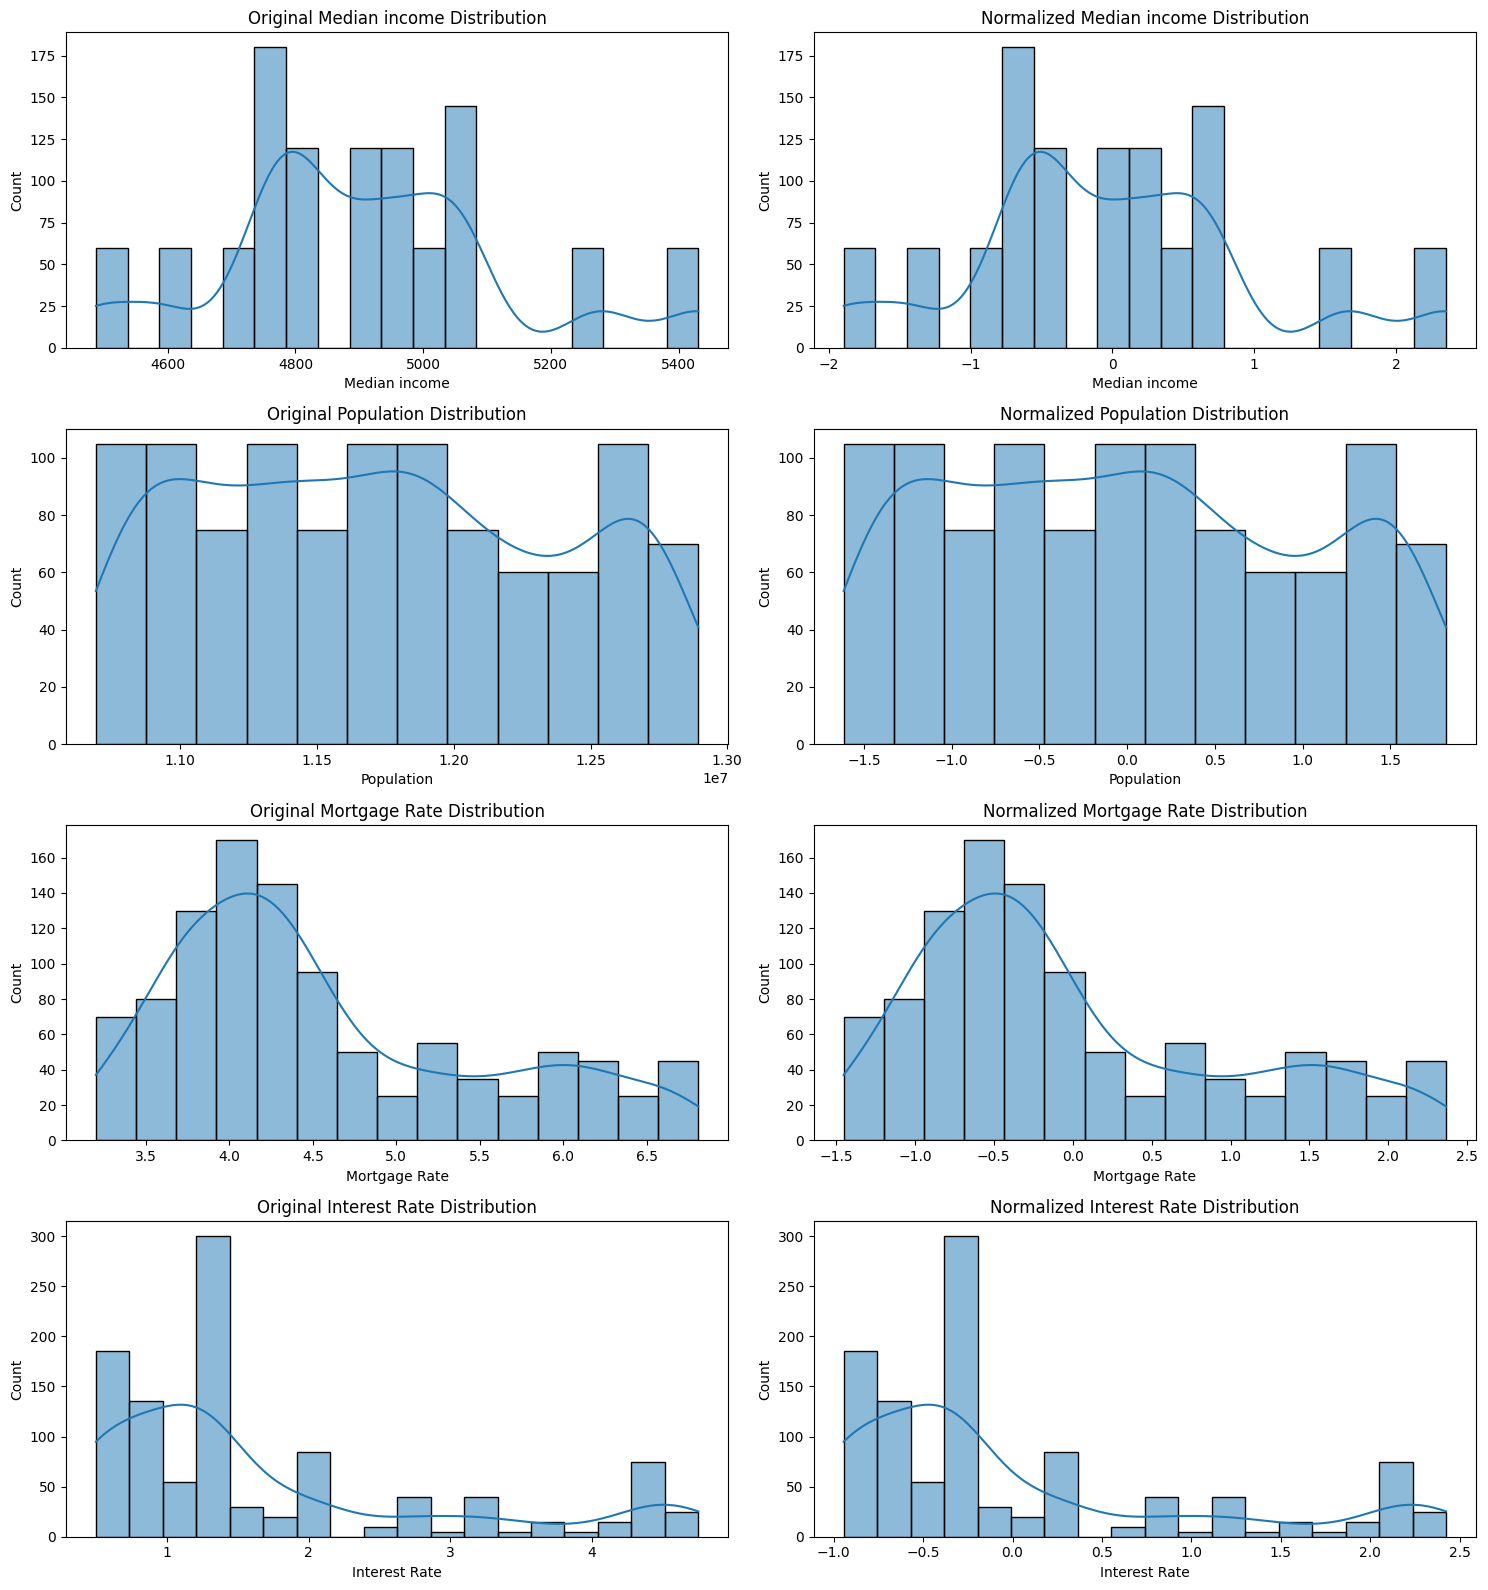

Normalization Parameters:
Median income:
  Original Mean: 4908.3413
  Original Standard Deviation: 222.0223
Population:
  Original Mean: 11728265.5630
  Original Standard Deviation: 641477.5103
Mortgage Rate:
  Original Mean: 4.5723
  Original Standard Deviation: 0.9458
Interest Rate:
  Original Mean: 1.6914
  Original Standard Deviation: 1.2617


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def standard_normalize(df, columns):
    """
    Perform standard normalization (Z-score normalization) on specified columns
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame
    columns : list
        List of column names to normalize
    
    Returns:
    --------
    pandas.DataFrame: DataFrame with normalized columns
    dict: Normalization parameters (mean and standard deviation)
    """
    # Create a copy of the dataframe to avoid modifying original
    normalized_df = df.copy()
    
    # Initialize StandardScaler
    scaler = StandardScaler()
    
    # Store normalization parameters
    normalization_params = {}
    
    # Normalize specified columns
    normalized_df[columns] = scaler.fit_transform(normalized_df[columns])
    
    # Store normalization parameters for each column
    for col in columns:
        normalization_params[col] = {
            'original_mean': scaler.mean_[list(scaler.feature_names_in_).index(col)],
            'original_std': scaler.scale_[list(scaler.feature_names_in_).index(col)]
        }
    
    return normalized_df, normalization_params

def inverse_standard_normalize(normalized_df, columns, normalization_params):
    """
    Reverse standard normalization to original scale
    
    Parameters:
    -----------
    normalized_df : pandas.DataFrame
        DataFrame with normalized columns
    columns : list
        List of column names that were normalized
    normalization_params : dict
        Normalization parameters (mean and standard deviation)
    
    Returns:
    --------
    pandas.DataFrame: DataFrame with columns restored to original scale
    """
    # Create a copy of the dataframe
    original_scale_df = normalized_df.copy()
    
    # Reverse normalization for each column
    for col in columns:
        original_scale_df[col] = (
            original_scale_df[col] * normalization_params[col]['original_std'] + 
            normalization_params[col]['original_mean']
        )
    
    return original_scale_df

def visualize_normalization_effect(df, normalized_df, columns):
    """
    Visualize the effect of standard normalization
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Original DataFrame
    normalized_df : pandas.DataFrame
        Normalized DataFrame
    columns : list
        List of normalized columns
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Create subplots
    fig, axes = plt.subplots(len(columns), 2, figsize=(15, 4*len(columns)))
    
    for idx, col in enumerate(columns):
        # Original data distribution
        sns.histplot(df[col], ax=axes[idx, 0], kde=True)
        axes[idx, 0].set_title(f'Original {col} Distribution')
        
        # Normalized data distribution
        sns.histplot(normalized_df[col], ax=axes[idx, 1], kde=True)
        axes[idx, 1].set_title(f'Normalized {col} Distribution')
    
    plt.tight_layout()
    plt.show()

# Example usage
def main():
    # Columns to normalize
    normalize_cols = ['Median income', 'Population', 'Mortgage Rate', 'Interest Rate']
    
    # Perform standard normalization
    normalized_df, normalization_params = standard_normalize(df, normalize_cols)
    normalized_df.to_csv("normalized_data.csv", index=False, encoding='utf-8' )
    # Visualize normalization effect
    visualize_normalization_effect(df, normalized_df, normalize_cols)
    
    # Print normalization parameters
    print("Normalization Parameters:")
    for col, params in normalization_params.items():
        print(f"{col}:")
        print(f"  Original Mean: {params['original_mean']:.4f}")
        print(f"  Original Standard Deviation: {params['original_std']:.4f}")
    
    # Demonstrate inverse transformation
    restored_df = inverse_standard_normalize(normalized_df, normalize_cols, normalization_params)

if __name__ == "__main__":
    main()

# 5. Dimensionality Reduction

In [28]:
normalize_df = pd.read_csv("normalized_data.csv")
normalize_df

,Date,Median income,Population,Mortgage Rate,Interest Rate,property_type,price
0,2005-01-01,-1.895491,-1.615949,1.086638,0.839017,One_storey,207700
1,2005-02-01,-1.895491,-1.615949,1.076064,0.839017,One_storey,208400
2,2005-03-01,-1.895491,-1.615949,1.086638,0.839017,One_storey,209200
3,2005-04-01,-1.895491,-1.581883,1.160652,0.839017,One_storey,210100
4,2005-05-01,-1.895491,-1.581883,1.033770,0.839017,One_storey,210600
...,...,...,...,...,...,...,...
1040,2022-01-01,0.713106,1.757004,-1.197229,-0.944250,Composite,810100
1041,2022-02-01,0.713106,1.757004,-1.049201,-0.944250,Composite,834700
1042,2022-03-01,0.713106,1.757004,-0.848305,-0.746109,Composite,834300
1043,2022-04-01,0.713106,1.817485,-0.404220,-0.349828,Composite,819800


Starting PCA analysis...
Using normalized numeric columns: ['Median income', 'Population', 'Mortgage Rate', 'Interest Rate']

Explained variance ratio by component:
PC1: 0.8147 (0.8147 cumulative)
PC2: 0.1387 (0.9533 cumulative)
PC3: 0.0346 (0.9880 cumulative)
PC4: 0.0120 (1.0000 cumulative)


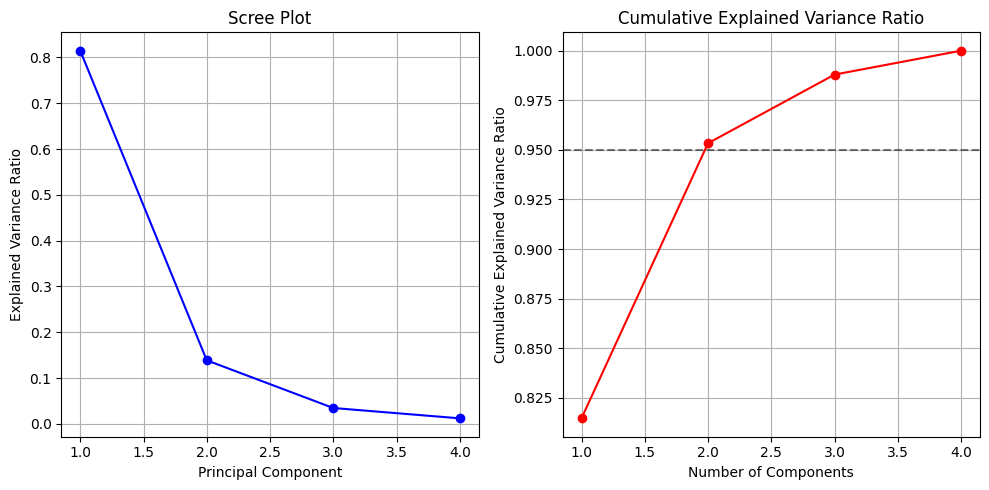

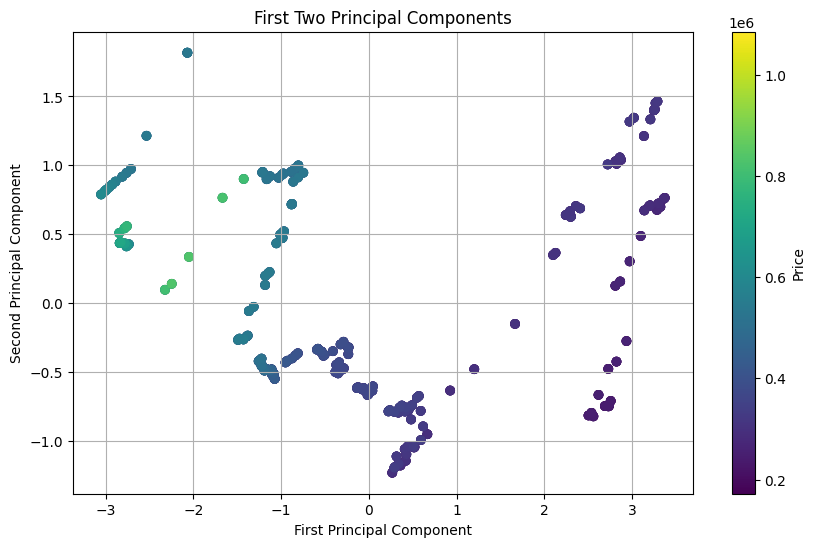


Component loadings:
                 PC1    PC2    PC3    PC4
Median income -0.499  0.512  0.466 -0.521
Population    -0.517  0.417 -0.212  0.716
Mortgage Rate  0.519  0.293  0.691  0.409
Interest Rate  0.462  0.691 -0.511 -0.220


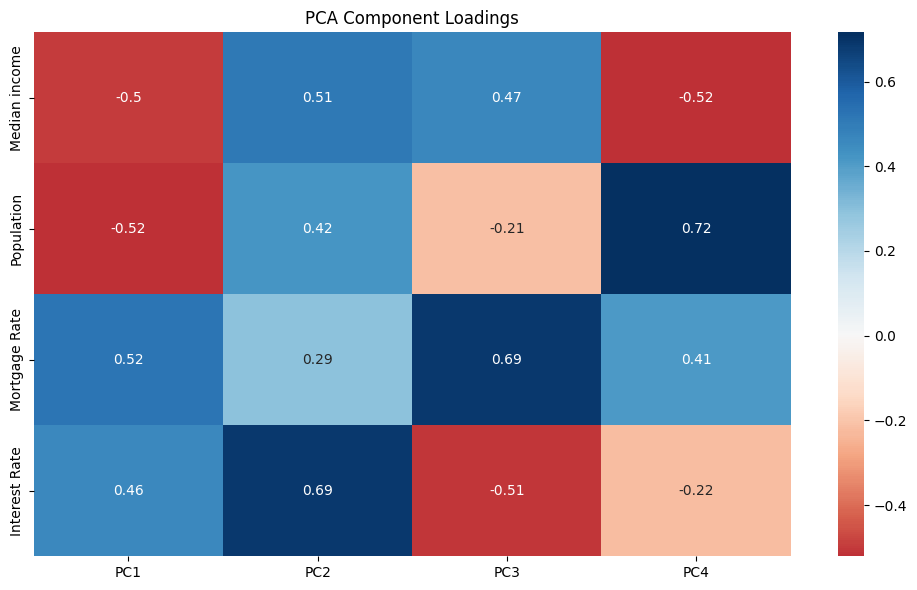

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def apply_pca(df):
    """
    Apply PCA to the dataset with mixed data types
    
    Args:
        df: DataFrame with Date, normalized columns, categorical property_type, and price
    Returns:
        DataFrame with PCA results and explained variance ratios
    """
    # 1. Separate different types of columns
    # Exclude Date, price, and categorical columns from PCA
    numeric_cols = [col for col in df.columns if col not in ['Date', 'price', 'property_type']]
    
    # Get normalized numeric features
    X_numeric = df[numeric_cols]
    
    # 2. Apply PCA to normalized numeric features
    pca = PCA()
    pca_result = pca.fit_transform(X_numeric)
    
    # Create DataFrame with PCA results
    pca_df = pd.DataFrame(
        data=pca_result,
        columns=[f'PC{i+1}' for i in range(pca_result.shape[1])]
    )
    
    # Calculate explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    
    # Print variance explained by each component
    print("\nExplained variance ratio by component:")
    for i, var in enumerate(explained_variance_ratio, 1):
        print(f"PC{i}: {var:.4f} ({cumulative_variance_ratio[i-1]:.4f} cumulative)")
    
    # 3. Visualizations
    # Scree plot
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(explained_variance_ratio) + 1), 
             explained_variance_ratio, 'bo-')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.grid(True)

    # Cumulative variance plot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cumulative_variance_ratio) + 1), 
             cumulative_variance_ratio, 'ro-')
    plt.axhline(y=0.95, color='k', linestyle='--', alpha=0.5)
    plt.title('Cumulative Explained Variance Ratio')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 4. Plot first two principal components with price as color
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                         c=df['price'], cmap='viridis')
    plt.colorbar(scatter, label='Price')
    plt.title('First Two Principal Components')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(True)
    plt.show()

    # 5. Show component loadings
    component_loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(pca_result.shape[1])],
        index=numeric_cols
    )
    
    print("\nComponent loadings:")
    print(component_loadings.round(3))
    
    # Plot heatmap of component loadings
    plt.figure(figsize=(10, 6))
    sns.heatmap(component_loadings, annot=True, cmap='RdBu', center=0)
    plt.title('PCA Component Loadings')
    plt.tight_layout()
    plt.show()
    
    # Add the first few principal components to original dataframe
    n_components = min(3, pca_result.shape[1])  # Take first 3 or less components
    for i in range(n_components):
        df[f'PC{i+1}'] = pca_result[:, i]
    
    return df, component_loadings, explained_variance_ratio

def main(df):
    """
    Main function to perform PCA analysis
    """
    print("Starting PCA analysis...")
    print(f"Using normalized numeric columns: {[col for col in df.columns if col not in ['Date', 'price', 'property_type']]}")
    
    # Apply PCA
    df_with_pca, loadings, variance_ratio = apply_pca(df)
    
    return df_with_pca, loadings, variance_ratio

# Usage example:
df_with_pca, loadings, variance_ratio = main(normalize_df)


=== Time Series Analysis ===


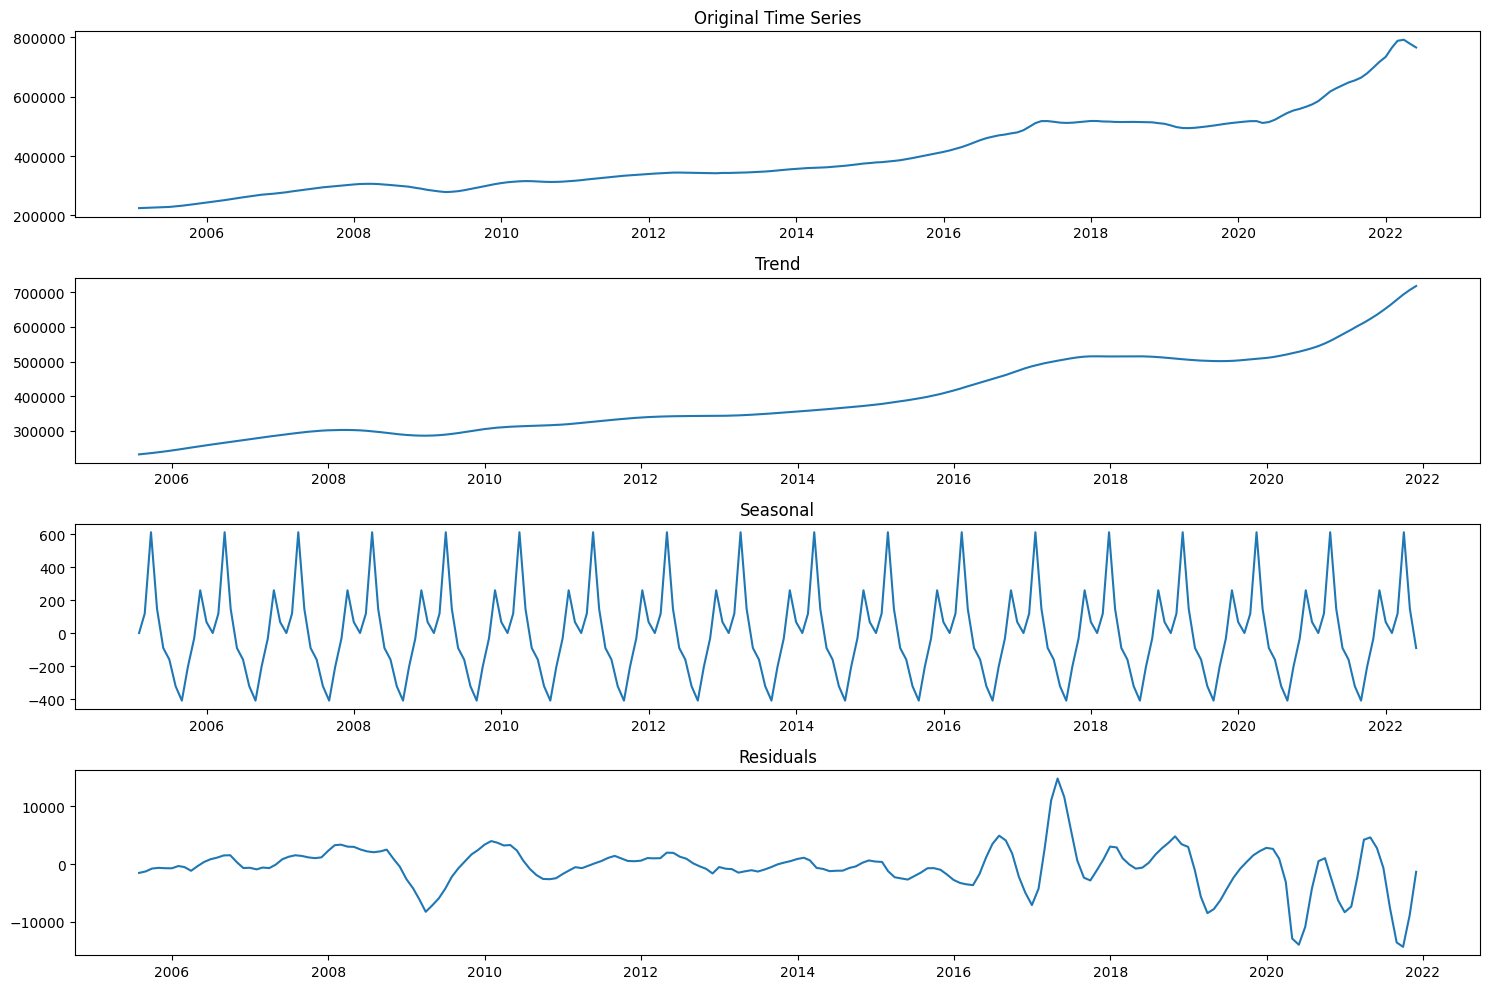

ADF Statistic: 0.6452896886701194
p-value: 0.9886803406055613

=== Clustering Analysis ===


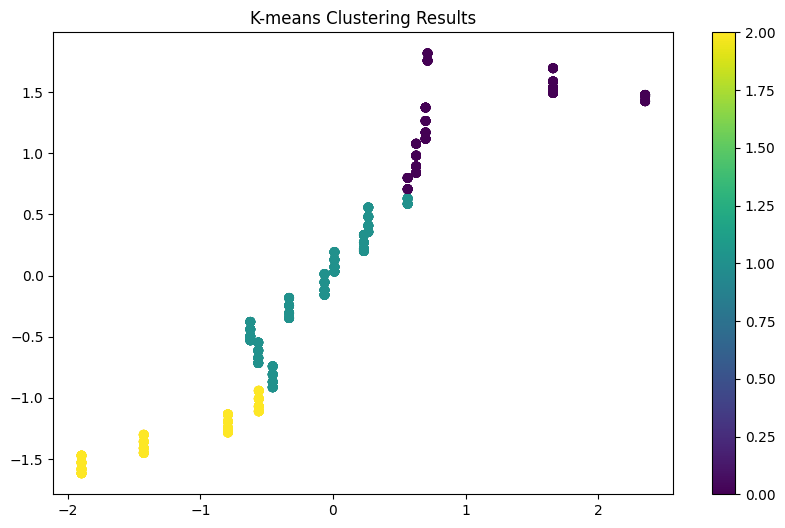

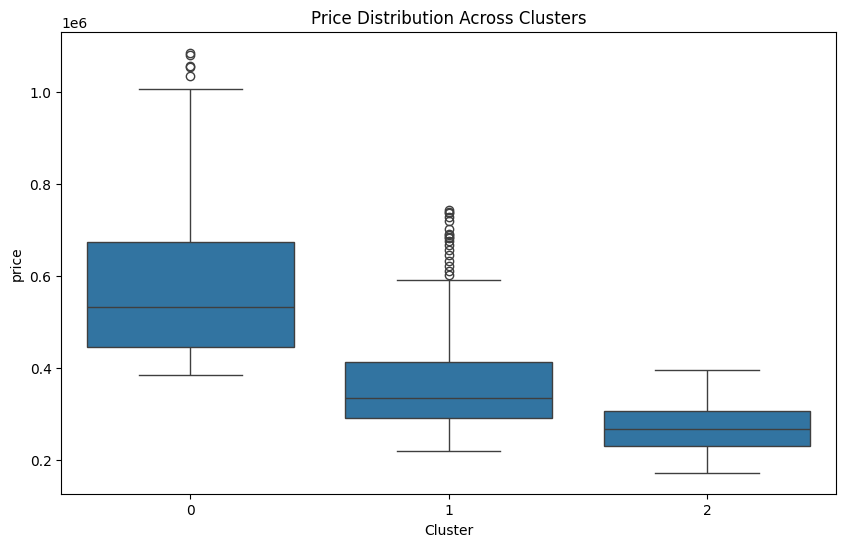


=== Regression Analysis ===

Linear Regression Results:
MSE: 5340820195.63
R2 Score: 0.76


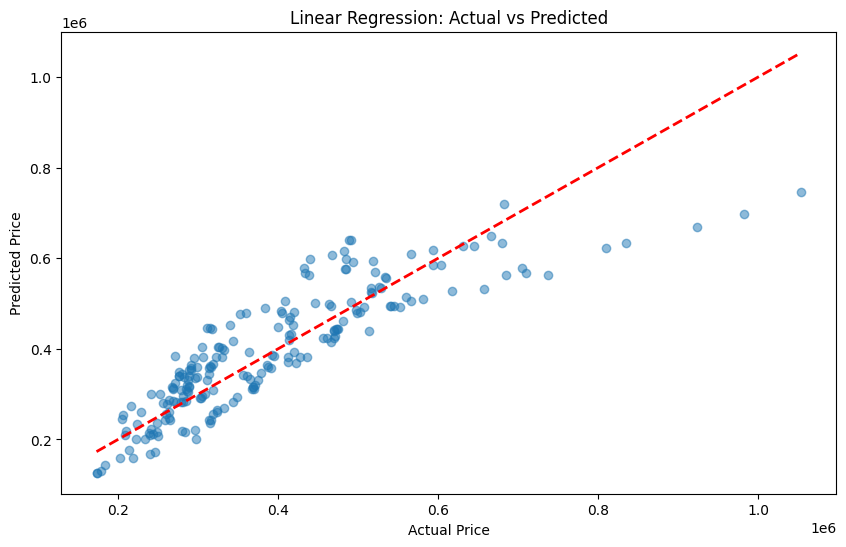


Random Forest Results:
MSE: 47735198.19
R2 Score: 1.00


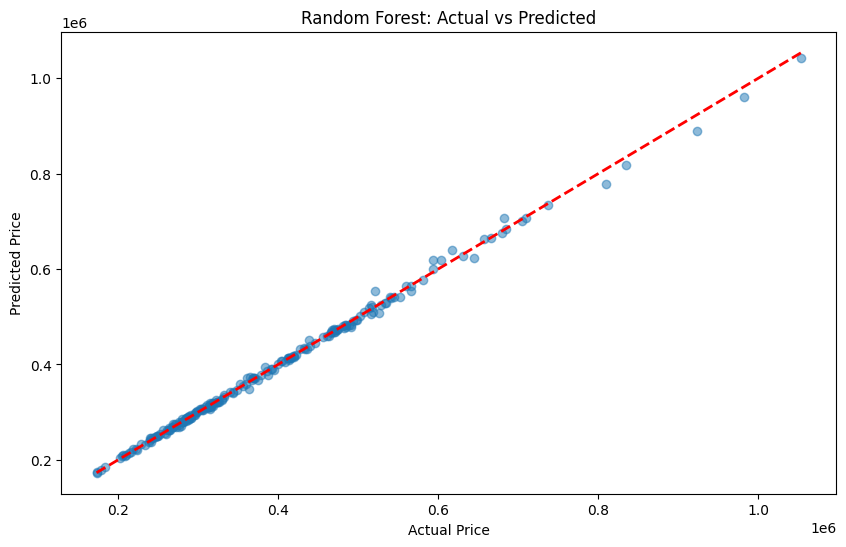


=== Classification Analysis ===

Classification Report:
              precision    recall  f1-score   support

        High       0.97      0.98      0.98        66
         Low       0.97      1.00      0.99        75
      Medium       0.98      0.94      0.96        68

    accuracy                           0.98       209
   macro avg       0.98      0.98      0.98       209
weighted avg       0.98      0.98      0.98       209



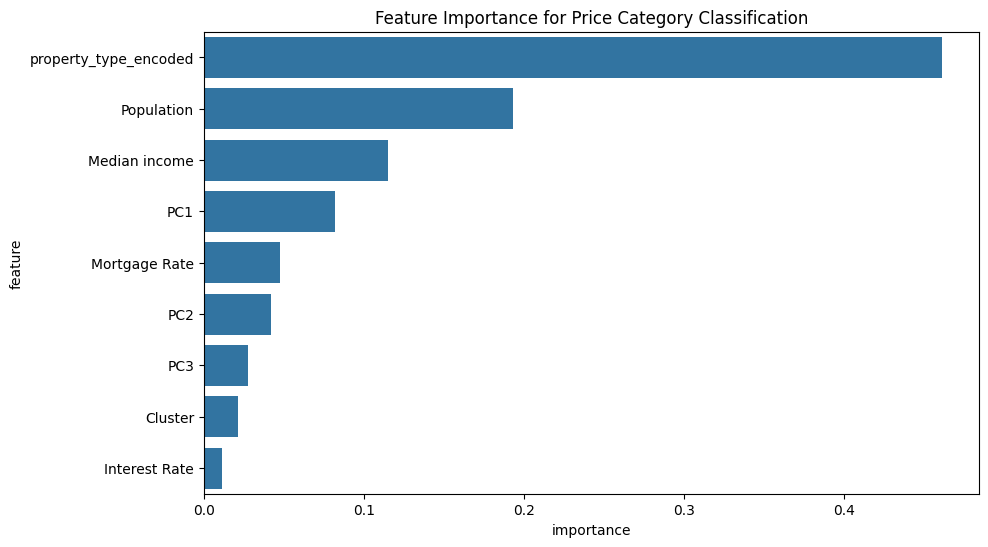


=== Probabilistic Analysis ===

Naive Bayes Classification Report:
              precision    recall  f1-score   support

        High       0.67      0.77      0.72        66
         Low       0.81      0.75      0.78        75
      Medium       0.48      0.46      0.47        68

    accuracy                           0.66       209
   macro avg       0.66      0.66      0.66       209
weighted avg       0.66      0.66      0.66       209



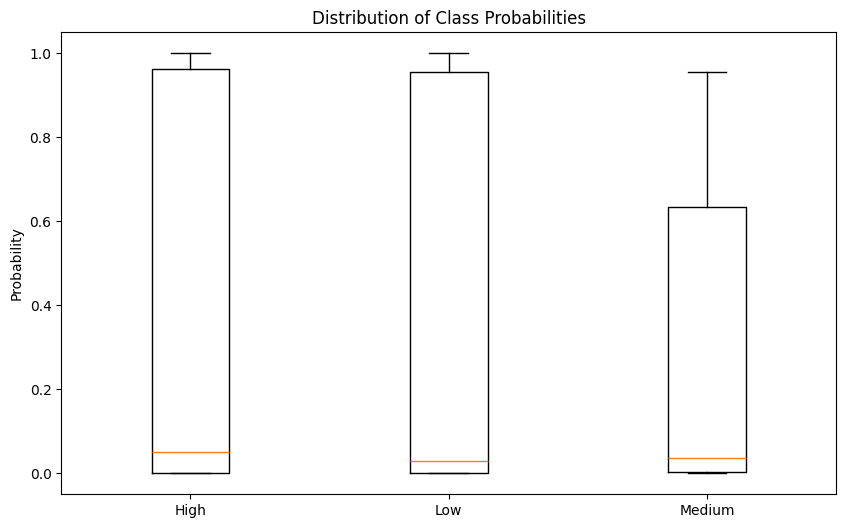

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

class ComprehensiveAnalysis:
    def __init__(self, input_df):  # Fixed initialization
        """Initialize with input DataFrame"""
        self.df = input_df.copy()
        self.prepare_data()

    def prepare_data(self):
        """Prepare data for analysis"""
        # Convert Date to datetime if it's not already
        if 'Date' in self.df.columns:
            self.df['Date'] = pd.to_datetime(self.df['Date'])
            self.df.set_index('Date', inplace=True)
        
        # Handle categorical variables
        if 'property_type' in self.df.columns:
            le = LabelEncoder()
            self.df['property_type_encoded'] = le.fit_transform(self.df['property_type'])

    def time_series_analysis(self):
        """Perform time series analysis on price"""
        print("\n=== Time Series Analysis ===")
        try:
            # Resample data to monthly mean
            monthly_data = self.df['price'].resample('M').mean()
            
            # Perform seasonal decomposition
            decomposition = seasonal_decompose(monthly_data, period=12)
            
            # Plot decomposition
            plt.figure(figsize=(15, 10))
            plt.subplot(411)
            plt.plot(monthly_data)
            plt.title('Original Time Series')
            plt.subplot(412)
            plt.plot(decomposition.trend)
            plt.title('Trend')
            plt.subplot(413)
            plt.plot(decomposition.seasonal)
            plt.title('Seasonal')
            plt.subplot(414)
            plt.plot(decomposition.resid)
            plt.title('Residuals')
            plt.tight_layout()
            plt.show()

            # Perform Augmented Dickey-Fuller test
            result = adfuller(monthly_data.dropna())
            print('ADF Statistic:', result[0])
            print('p-value:', result[1])
        except Exception as e:
            print(f"Error in time series analysis: {e}")

    def clustering_analysis(self):
        """Perform clustering analysis"""
        print("\n=== Clustering Analysis ===")
        try:
            # Prepare features for clustering
            features = self.df.drop(['price', 'property_type'], axis=1, errors='ignore')
            
            # Standardize features
            scaler = StandardScaler()
            features_scaled = scaler.fit_transform(features)
            
            # Apply K-means clustering
            n_clusters = 3
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            clusters = kmeans.fit_predict(features_scaled)
            
            # Visualize clusters using first two features
            plt.figure(figsize=(10, 6))
            scatter = plt.scatter(features_scaled[:, 0], features_scaled[:, 1], 
                                c=clusters, cmap='viridis')
            plt.title('K-means Clustering Results')
            plt.colorbar(scatter)
            plt.show()
            
            # Analyze price distribution across clusters
            self.df['Cluster'] = clusters
            plt.figure(figsize=(10, 6))
            sns.boxplot(x='Cluster', y='price', data=self.df)
            plt.title('Price Distribution Across Clusters')
            plt.show()
        except Exception as e:
            print(f"Error in clustering analysis: {e}")

    def regression_analysis(self):
        """Perform regression analysis"""
        print("\n=== Regression Analysis ===")
        try:
            # Prepare features and target
            X = self.df.drop(['price', 'property_type'], axis=1, errors='ignore')
            y = self.df['price']
            
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Train models
            models = {
                'Linear Regression': LinearRegression(),
                'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
            }
            
            for name, model in models.items():
                # Train and predict
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                
                # Calculate metrics
                mse = mean_squared_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)
                
                print(f'\n{name} Results:')
                print(f'MSE: {mse:.2f}')
                print(f'R2 Score: {r2:.2f}')
                
                # Plot actual vs predicted
                plt.figure(figsize=(10, 6))
                plt.scatter(y_test, y_pred, alpha=0.5)
                plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
                plt.xlabel('Actual Price')
                plt.ylabel('Predicted Price')
                plt.title(f'{name}: Actual vs Predicted')
                plt.show()
        except Exception as e:
            print(f"Error in regression analysis: {e}")

    def classification_analysis(self):
        """Perform classification analysis"""
        print("\n=== Classification Analysis ===")
        try:
            # Create price categories for classification
            self.df['price_category'] = pd.qcut(self.df['price'], q=3, labels=['Low', 'Medium', 'High'])
            
            # Prepare features and target
            X = self.df.drop(['price', 'price_category', 'property_type'], axis=1, errors='ignore')
            y = self.df['price_category']
            
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Train Random Forest Classifier
            clf = RandomForestClassifier(n_estimators=100, random_state=42)
            clf.fit(X_train, y_train)
            
            # Make predictions
            y_pred = clf.predict(X_test)
            
            # Print classification report
            print('\nClassification Report:')
            print(classification_report(y_test, y_pred))
            
            # Feature importance plot
            feature_importance = pd.DataFrame({
                'feature': X.columns,
                'importance': clf.feature_importances_
            }).sort_values('importance', ascending=False)
            
            plt.figure(figsize=(10, 6))
            sns.barplot(x='importance', y='feature', data=feature_importance)
            plt.title('Feature Importance for Price Category Classification')
            plt.show()
        except Exception as e:
            print(f"Error in classification analysis: {e}")

    def probabilistic_analysis(self):
        """Perform probabilistic analysis using Naive Bayes"""
        print("\n=== Probabilistic Analysis ===")
        try:
            # Create price categories if not exists
            if 'price_category' not in self.df.columns:
                self.df['price_category'] = pd.qcut(self.df['price'], q=3, labels=['Low', 'Medium', 'High'])
            
            # Prepare features and target
            X = self.df.drop(['price', 'price_category', 'property_type'], axis=1, errors='ignore')
            y = self.df['price_category']
            
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Train Naive Bayes
            nb = GaussianNB()
            nb.fit(X_train, y_train)
            
            # Make predictions
            y_pred = nb.predict(X_test)
            
            # Print classification report
            print('\nNaive Bayes Classification Report:')
            print(classification_report(y_test, y_pred))
            
            # Calculate and plot class probabilities
            probabilities = nb.predict_proba(X_test)
            plt.figure(figsize=(10, 6))
            plt.boxplot([probabilities[:, i] for i in range(probabilities.shape[1])])
            plt.title('Distribution of Class Probabilities')
            plt.xticks(range(1, len(nb.classes_) + 1), nb.classes_)
            plt.ylabel('Probability')
            plt.show()
        except Exception as e:
            print(f"Error in probabilistic analysis: {e}")

def run_analysis(input_df):
    """Run all analyses"""
    # Create analyzer instance
    analyzer = ComprehensiveAnalysis(input_df)
    
    # Run all analyses
    analyzer.time_series_analysis()
    analyzer.clustering_analysis()
    analyzer.regression_analysis()
    analyzer.classification_analysis()
    analyzer.probabilistic_analysis()
    
    return analyzer

# Usage example:
analyzer = run_analysis(normalize_df)